In [167]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import _tree
import seaborn as sns

In [168]:
df = pd.read_csv('winequality-red.csv')
#df.describe().T

In [169]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [170]:
X=df.iloc[:,:11]
y=df.iloc[:,11:12]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)



In [171]:

class_names = clf.classes_
feature_names = X.columns

In [172]:
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

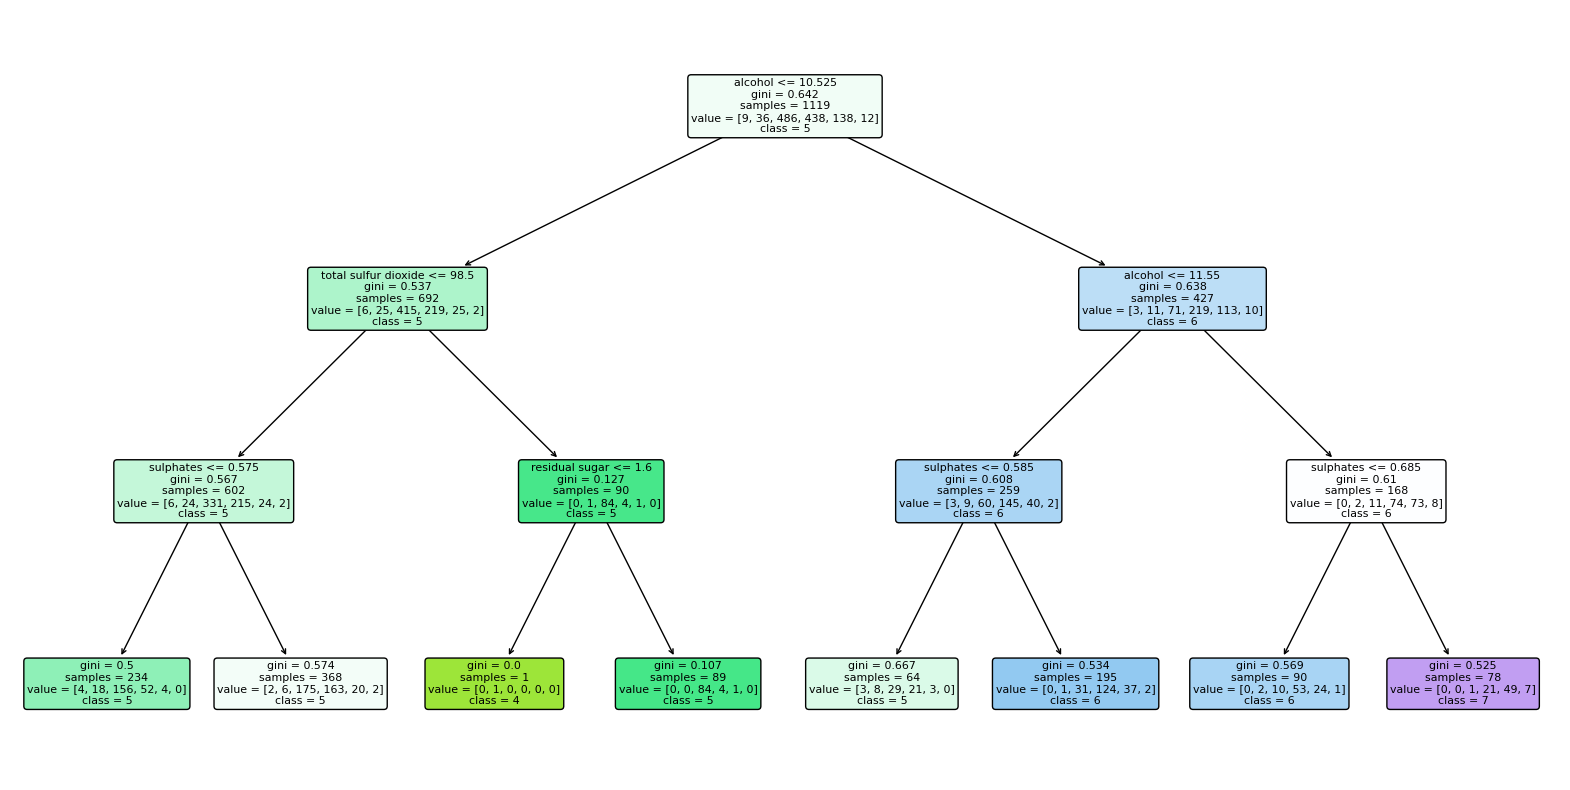

In [173]:
plt.figure(figsize=(20,10))
class_names = [str(name) for name in class_names]

plot_tree(clf, feature_names=X.columns,  class_names= class_names,  filled=True, rounded=True);
plt.show()

In [174]:

class_names = clf.classes_
feature_names = X.columns
class_names

array([3, 4, 5, 6, 7, 8])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='volatile acidity'>

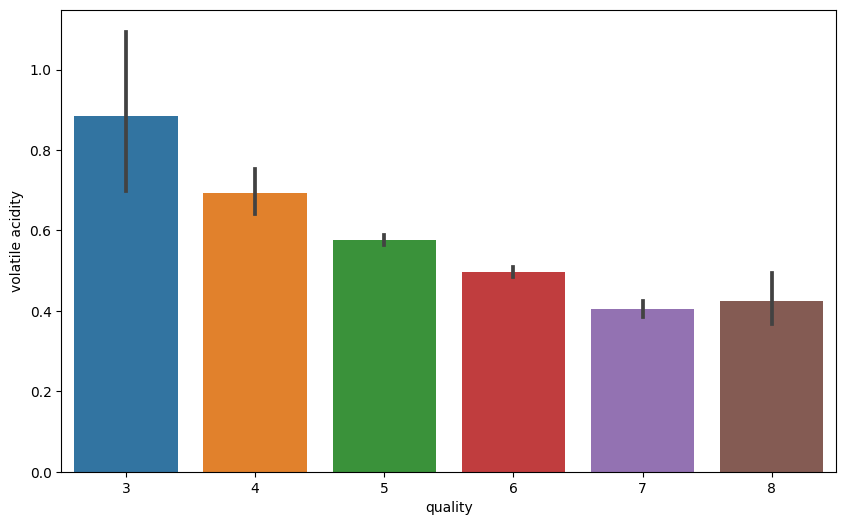

In [175]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='citric acid'>

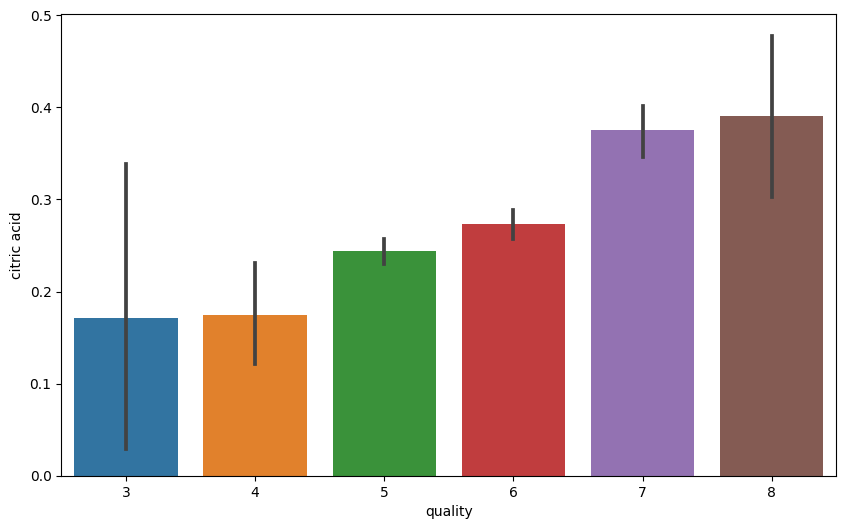

In [176]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

In [177]:
def tree_to_decision_table(tree_classifier, feature_names, class_names):

   
    def update_bounds(current_bounds, threshold, is_left):
        
        lower_bound, upper_bound = current_bounds
        if is_left:
            return (lower_bound, min(upper_bound, threshold))
        else:
            return (max(lower_bound, threshold), upper_bound)

    
    def format_rule(lower_bound, upper_bound):

        if lower_bound == float('-inf') and upper_bound == float('inf'):
            return "-"
        elif lower_bound == float('-inf'):
            return f"<= {upper_bound:.2f}"
        elif upper_bound == float('inf'):
            return f"> {lower_bound:.2f}"
        else:
            return f"({lower_bound:.2f}; {upper_bound:.2f}]"


    tree_ = tree_classifier.tree_
    feature = tree_.feature
    threshold = tree_.threshold
    children_left = tree_.children_left
    children_right = tree_.children_right
    value = tree_.value

    decision_paths = []
    bounds = {fn: (float('-inf'), float('inf')) for fn in feature_names}

    def traverse(node, current_rule):
        if feature[node] == -2:  # Leaf node
            predictions = value[node][0]
            predicted_class = class_names[np.argmax(predictions)]
            formatted_rule = {k: format_rule(*v) for k, v in current_rule.items()}
            decision_paths.append({**formatted_rule, 'Class': predicted_class})
        else:
            name = feature_names[feature[node]]
            thres = threshold[node]
            left_bounds = update_bounds(current_rule.get(name, (float('-inf'), float('inf'))), thres, True)
            right_bounds = update_bounds(current_rule.get(name, (float('-inf'), float('inf'))), thres, False)

            left_rule = current_rule.copy()
            right_rule = current_rule.copy()
            left_rule[name] = left_bounds
            right_rule[name] = right_bounds

            traverse(children_left[node], left_rule)
            traverse(children_right[node], right_rule)

    traverse(0, bounds)
    decision_table = pd.DataFrame(decision_paths)
    decision_table.fillna('-', inplace=True)
    columns_sorted = [col for col in feature_names if col in decision_table] + ['Class']
    decision_table = decision_table.reindex(columns=columns_sorted)

    return decision_table.T


In [178]:
tree_to_decision_table(clf,feature_names=feature_names,class_names=class_names)

,0,1,2,3,4,5,6,7
fixed acidity,-,-,-,-,-,-,-,-
volatile acidity,-,-,-,-,-,-,-,-
citric acid,-,-,-,-,-,-,-,-
residual sugar,-,-,<= 1.60,> 1.60,-,-,-,-
chlorides,-,-,-,-,-,-,-,-
free sulfur dioxide,-,-,-,-,-,-,-,-
total sulfur dioxide,<= 98.50,<= 98.50,> 98.50,> 98.50,-,-,-,-
density,-,-,-,-,-,-,-,-
pH,-,-,-,-,-,-,-,-
sulphates,<= 0.57,> 0.57,-,-,<= 0.58,> 0.58,<= 0.69,> 0.69


In [ ]:
decision_table_df.to_csv('WineQuality_DecisionTree.csv')